<a href="https://colab.research.google.com/github/gabiamorim2/maratona_ciencia_de_dados/blob/main/Projeto_Maratona_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maratona Ciência de Dados: abril - 2022.**

**Sobre o projeto:** O presente projeto foi desenvolvido ao longo da Maratona Ciência de Dados - do zero a primeira vaga, que aconteceu em 4, 5, 6 e 7 de abril de 2022, ministrada por Victor Barros (Cientista de Dados), com o objetivo de apresentar as principais ferramentas e bibliotecas para quem já trabalha com dados ou para quem está iniciando sua carreira nesta área. Este projeto usa uma base de dados fictícia e tem o propósito de demonstrar e praticar os conhecimentos adquiridos ao longo das aulas, que foram além do uso das principais bibliotecas, finalizando o projeto com uma implementação de um modelo preditivo.



**Base de dados:** Comparação de investimentos em campanhas de marketing feitas na TV, no jornal e no rádio e total de vendas resultantes das campanhas em cada mídia.

**1. Bibliotecas e Pacotes**

In [ ]:
#manipulação de dados
import pandas as pd
import joblib
import numpy as np

#visualização dos dados
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt

#aplicação de machine learning, regressão linear e avaliação de modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#para exportação do modelo de previsão
import joblib

import warnings
warnings.filterwarnings('ignore')

**2. Arquivo**

*   **Transformando a tabela excel em um dataframe para visualização e manipulação dos dados:**

In [ ]:
marketing_df = pd.read_excel("vendas_marketing.xlsx")

In [ ]:
marketing_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
marketing_df.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
linhas, colunas = marketing_df.shape

In [ ]:
print(linhas)

200


In [ ]:
print(colunas)

4


In [ ]:
#conferindo se existe dados faltantes no dataframe

marketing_df.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

*   **Estatística descritiva das campanhas:**

**1.   count:** contagem de valores únicos;

**2.   mean:** média;

**3.   std:** desvio padrão;

**4.   min:** valor mínimo;

**5.   max:** valor máximo.

In [ ]:
marketing_df.describe().round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


**3. Visualização**

*   Gráfico ***boxplot*** para visualizar os investimentos de cada campanha realizada.

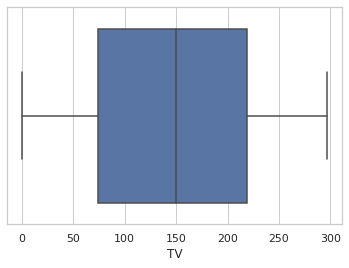

In [ ]:
grafico_tv = sns.boxplot(marketing_df['TV'], palette='deep')

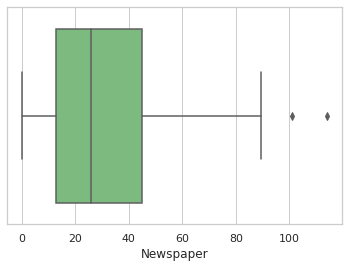

In [ ]:
grafico_jornal = sns.boxplot(marketing_df['Newspaper'], palette='Greens')

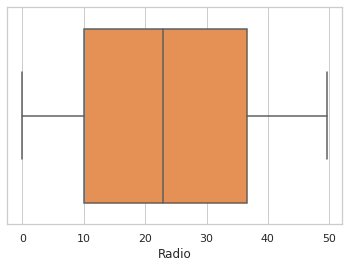

In [ ]:
grafico_radio = sns.boxplot(marketing_df['Radio'], palette='Oranges')

*   Gráfico de ***dispersão*** para visualizar a relação entre os os gastos investidos na campanha e as vendas realizadas.

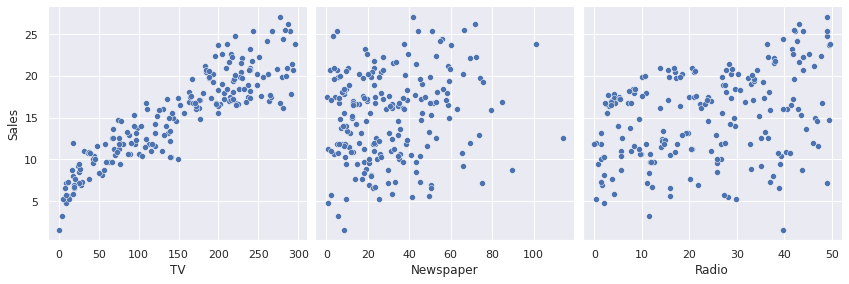

In [ ]:
sns.pairplot(marketing_df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter', palette='deep');

*   Gráfico de ***correlação*** entre as variáveis:

In [ ]:
#usando a função .corr() para calcular a correlação entre as variáveis

marketing_df.corr().round(2)

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Newspaper,0.06,0.35,1.00,0.16
Sales,0.90,0.35,0.16,1.00


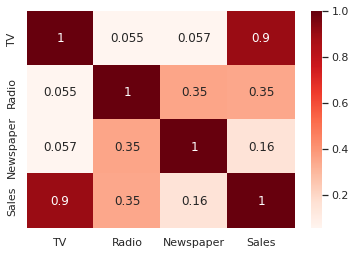

In [ ]:
#construindo um gráfico de calor (heatmap)

sns.heatmap(marketing_df.corr(), cmap='Reds', annot=True);

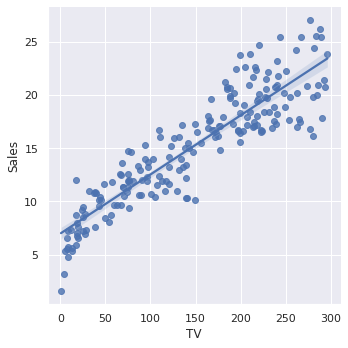

In [ ]:
#gráfico de dispersão com linha de regressão

sns.set(color_codes=True)
sns.lmplot(x='TV', y='Sales', data=marketing_df, palette='tab10');

*   A partir do gráfico acima, podemos observar que a relação entre os investimentos em campanhas de marketing na TV e as vendas resultantes formam uma correlação positiva, demonstrando uma relação linear entre as variáveis, ou seja, quando um valor aumenta o outro valor aumenta também.

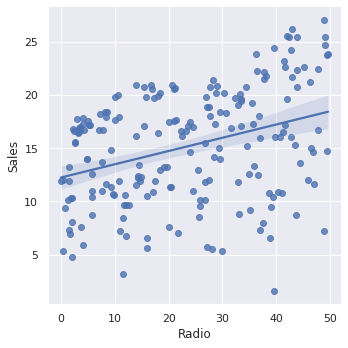

In [ ]:
sns.set(color_codes=True)
sns.lmplot(x='Radio', y='Sales', data=marketing_df, palette='tab10');

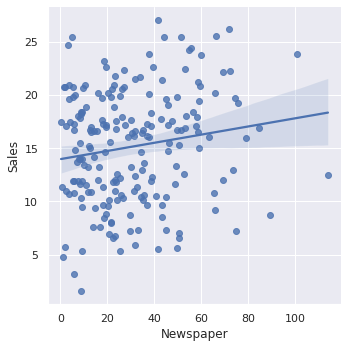

In [ ]:
sns.set(color_codes=True)
sns.lmplot(x='Newspaper', y='Sales', data=marketing_df, palette='tab10');

*   Os dois gráficos demonstrados acima, sobre os investimentos e vendas feitos no jornal e rádio, não possuem uma correlação entre as variáveis, ou seja, é uma correlação nula, onde as variáveis são indepententes. 

**4. Regressão Linear**

In [ ]:
#contrução do X para regressão linear simples

X = marketing_df[['TV']]

In [ ]:
X.shape

(200, 1)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
y = marketing_df[['Sales']]

In [ ]:
y.shape

(200, 1)

In [ ]:
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


*   Vamos usar a biblioteca ***scikit learn*** para construir 2 base de dados, uma de treino e uma de teste:

In [ ]:
#método train_test_split: 70% usados para treino, 30% usados para teste

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
X_train.shape

(140, 1)

In [ ]:
X_test.shape

(60, 1)

In [ ]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [ ]:
X_test.head()

,TV
126,7.8
104,238.2
99,135.2
92,217.7
111,241.7


In [ ]:
#importando a regressão linear para dentro do projeto

regressao_l = LinearRegression()

In [ ]:
regressao_l

LinearRegression()

In [ ]:
#utilizando o método fit

regressao_l.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressao_l.coef_

array([[0.05454575]])

**5.Predição e avaliação dos modelos**

In [ ]:
#utilizando os valores de X para o cálculo do valor de y, e depois usamos os valores reais de y para avaliar o modelo
#primeiro construimos a predição para avaliar o modelo

predicao = regressao_l.predict(X_test)

In [ ]:
predicao

array([[ 7.37414007],
       [19.94148154],
       [14.32326899],
       [18.82329361],
       [20.13239168],
       [18.2287449 ],
       [14.54145201],
       [17.72692398],
       [18.75238413],
       [18.77420243],
       [13.34144544],
       [19.46693349],
       [10.01415451],
       [17.1923756 ],
       [11.70507285],
       [12.08689312],
       [15.11418241],
       [16.23237035],
       [15.8669138 ],
       [13.1068987 ],
       [18.65965635],
       [14.00690363],
       [17.60692332],
       [16.60328147],
       [17.03419291],
       [18.96511257],
       [18.93783969],
       [11.05597839],
       [17.03419291],
       [13.66326538],
       [10.6796127 ],
       [10.71234015],
       [13.5487193 ],
       [17.22510305],
       [ 9.67597085],
       [13.52144643],
       [12.25053038],
       [16.13418799],
       [19.07965865],
       [17.48692266],
       [18.69783838],
       [16.53237199],
       [15.92145955],
       [18.86693021],
       [13.5050827 ],
       [11

*   Construindo um gráfico para visualização do ***fit***:

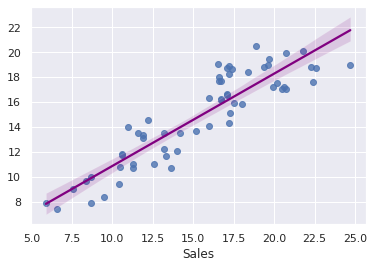

In [ ]:
grafico_predição = sns.regplot(y_test, predicao, line_kws={"color": "purple"});

No **gráfico acima**, podemos observar os pontos azuis que são os dados de teste e a reta em roxo é o melhor fit que foi construído.

**5.1 Avaliação dos modelos**

In [ ]:
R2 = r2_score(y_test, predicao)
print(R2)

0.7921031601245662


In [ ]:
MSE = mean_squared_error(y_test, predicao)
print(MSE)

4.077556371826948


In [ ]:
#raiz quadrada do MSE

RMSE = np.sqrt(MSE)
print(RMSE)

2.019296008966231


**5.2: Construindo uma predição**

In [ ]:
marketing_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
investimento_TV = float(input('TV: '))

TV: 87


In [ ]:
print(investimento_TV)

87.0


In [ ]:
regressao_l.predict([[investimento_TV]])
print(f'A previsão de vendas com um investimento de 87, em campanhas de marketing em TVs, é de {regressao_l.predict([[investimento_TV]])}')

A previsão de vendas com um investimento de 87, em campanhas de marketing em TVs, é de [[11.6941637]]


**6. Implementação do modelo**

*  Usando a biblioteca ***joblib*** para salvar e importar o modelo criado.

In [ ]:
joblib.dump(regressao_l, 'modelo_teste.pkl')

['modelo_teste.pkl']